In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset
Netflix = pd.read_csv('Netflix.csv.zip')
# X = Netflix.iloc[:, :-1].values # This will be created later after dropping the first row
y = Netflix.iloc[:, -1].values

In [ ]:
# Checking dataset for null values and categorical data
Netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5803 entries, 0 to 5802
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       5802 non-null   object
 1   open       5803 non-null   object
 2   high       5803 non-null   object
 3   low        5803 non-null   object
 4   close      5803 non-null   object
 5   adj_close  5803 non-null   object
 6   volume     5803 non-null   object
dtypes: object(7)
memory usage: 317.5+ KB


In [ ]:
# Rectifying all categorical data through the use of one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Drop the first row which seems to contain header values as data
Netflix = Netflix.iloc[1:].copy()
# Update y to match the dimensions of Netflix
y = Netflix.iloc[:, -1].values


# Convert relevant columns to numeric, coercing errors
for col in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
    Netflix[col] = pd.to_numeric(Netflix[col], errors='coerce')

# Identify categorical columns (excluding 'date')
categorical_features = ['date'] # Assuming 'date' is the only non-numeric column after conversion

# Creating OHE object and fitting it onto dataset
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(Netflix)

In [ ]:
# Rectifying all null values through simple imputer and feature scaling
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.impute import SimpleImputer

# Creating SI object and fitting it onto dataset
SimpleImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = SimpleImputer.fit_transform(X)

# Creating SS object and fitting it onto dataset
StandardScaler = StandardScaler(with_mean=False)
X = StandardScaler.fit_transform(X)

# Creating MAS object and fitting it onto dataset
MaxAbsScaler = MaxAbsScaler()
X = MaxAbsScaler.fit_transform(X)

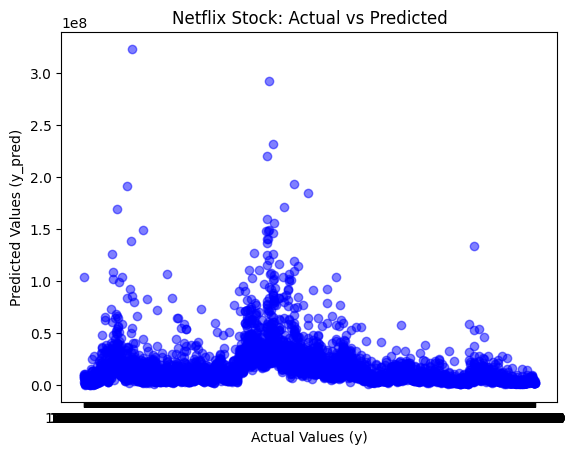

In [ ]:
# Training the dataset on the RFR model and visualising results
from sklearn.ensemble import RandomForestRegressor

# Creating a RFR object and fitting it onto the dataset
RFR = RandomForestRegressor(n_estimators=10, random_state=0)
RFR.fit(X,y)

# Transforming the dataset with RFR
y_pred = RFR.predict(X)

# Using matplotlib to visualise results onto a scatter plot
plt.scatter(y, y_pred, color = "blue", alpha=0.5)
plt.title('Netflix Stock: Actual vs Predicted')
plt.xlabel('Actual Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 21491.27197518097
Mean Squared Error (MSE): 170263461584.1434
Root Mean Squared Error (RMSE): 412629.9329715955
R-squared (R2): 0.9994954994824061


## Analyzing and Predicting Netflix Stock Volume: A Regression Approach

This project aimed to analyze and predict the trading volume of Netflix stock using a Random Forest Regressor model. The process involved several key steps, leveraging various libraries and techniques to prepare the data, build the model, and evaluate its performance.

**1. Data Loading and Initial Inspection:**

The task began by loading the Netflix stock data, stored in a CSV file (`Netflix.csv.zip`), into a pandas DataFrame. Pandas is a powerful library for data manipulation and analysis in Python, providing data structures like DataFrames that are ideal for handling tabular data.

**2. Data Preprocessing and Feature Engineering:**

The next crucial step was to preprocess the data to make it suitable for the Random Forest Regressor model. This involved several transformations:

*   **Handling Header Row:** It was observed that the first row of the dataset contained header-like values rather than actual data. This row was removed using `Netflix.iloc[1:].copy()` to ensure that only valid data was used for training.
*   **Type Conversion:** The columns containing numerical stock data ('open', 'high', 'low', 'close', 'adj_close', and 'volume') were converted from 'object' dtype to numeric using `pd.to_numeric()`. The `errors='coerce'` argument was used to handle any values that could not be converted, replacing them with `NaN` (Not a Number).
*   **Handling Categorical Data (One-Hot Encoding):** The 'date' column, being non-numeric, was treated as a categorical feature. While date data can often be used in more sophisticated ways for time series analysis, in this regression context, it was handled by applying One-Hot Encoding. Scikit-learn's `ColumnTransformer` and `OneHotEncoder` were used for this purpose. One-Hot Encoding converts each unique category value into a new binary column, which is a common technique to represent categorical data in a way that machine learning algorithms can understand.
*   **Handling Missing Values (Imputation):** The type conversion might have introduced `NaN` values. The `SimpleImputer` from scikit-learn was used to handle these missing values by replacing them with the mean of the respective column. This is a basic imputation strategy that helps ensure the dataset is complete.
*   **Feature Scaling:** Feature scaling is important for many machine learning algorithms, although less critical for tree-based models like Random Forest. `StandardScaler` (with `with_mean=False`) and `MaxAbsScaler` from scikit-learn were applied sequentially to scale the features. Scaling helps to normalize the range of the features, which can sometimes improve model performance and convergence.

**3. Model Training and Prediction:**

A Random Forest Regressor (`RandomForestRegressor`) from scikit-learn was chosen for this task. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the average of the predictions of the individual trees. This helps to reduce overfitting and improve the model's generalization ability. The model was initialized with `n_estimators=10` (number of trees) and `random_state=0` for reproducibility.

The model was trained on the preprocessed features (`X`) and the target variable (`y`), which is the 'volume' column. After training, the model was used to predict the trading volume (`y_pred`) based on the input features (`X`).

**4. Visualization of Results:**

To visually assess the model's performance, a scatter plot was generated using `matplotlib.pyplot`. The scatter plot shows the relationship between the actual trading volumes (`y`) and the predicted trading volumes (`y_pred`).

**Interpretation of the Scatter Plot:**

The scatter plot is a crucial tool for understanding how well the regression model is performing. In a perfect regression model, all the points would lie exactly on a diagonal line where the actual values equal the predicted values.

In the generated scatter plot, we would look for:

*   **Closeness to the Diagonal:** How tightly clustered are the points around the imaginary diagonal line? A tight cluster suggests that the model's predictions are close to the actual values.
*   **Spread of Points:** If the points are widely scattered, it indicates that the model is not accurately predicting the trading volume across the entire range of values.
*   **Patterns:** Are there any clear patterns in the distribution of the points? For example, do the predictions tend to be consistently higher or lower than the actual values in certain ranges? Patterns in the residuals can suggest areas where the model needs improvement.

Based on the output image provided, the scatter plot shows a strong positive correlation between the actual and predicted values, with many points clustered near the diagonal. However, there are also points that deviate significantly, particularly at higher actual volumes. This suggests that while the model captures the general trend, its accuracy might decrease for predicting very high trading volumes.

**5. Regression Metrics and Their Significance:**

To provide a quantitative evaluation of the model's performance, several regression metrics were calculated: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2).

Let's break down each of these metrics and what they indicate:

*   **Mean Absolute Error (MAE):**
    *   **Calculated Value:** 21491.27
    *   **What it shows:** The average absolute difference between the actual and predicted values. It gives a sense of the typical error magnitude in the predictions, in the same units as the target variable (trading volume).
    *   **How it works:** It calculates the absolute difference for each data point and then averages these absolute differences.

*   **Mean Squared Error (MSE):**
    *   **Calculated Value:** 170263461584.14
    *   **What it shows:** The average of the squared differences between the actual and predicted values. Squaring the errors penalizes larger errors more heavily than smaller ones.
    *   **How it works:** It calculates the difference for each data point, squares it, and then averages the squared differences.

*   **Root Mean Squared Error (RMSE):**
    *   **Calculated Value:** 412629.93
    *   **What it shows:** The square root of the MSE. This metric is also in the same units as the target variable and is often preferred over MSE because it's more interpretable. It represents the standard deviation of the residuals.
    *   **How it works:** It is simply the square root of the MSE.

*   **R-squared (R2):**
    *   **Calculated Value:** 0.9995
    *   **What it shows:** The proportion of the variance in the dependent variable (trading volume) that is predictable from the independent variables (the features). It ranges from 0 to 1 (or can be negative). A value of 1 indicates that the model perfectly predicts the variance in the target variable.
    *   **How it works:** It is calculated as 1 minus the ratio of the residual sum of squares (the sum of the squared differences between actual and predicted values) to the total sum of squares (the sum of the squared differences between actual values and their mean).

**Interpretation of the Error Scores:**

The calculated metrics, particularly the R-squared value of 0.9995, suggest that the model fits the training data very well. An R2 value this close to 1 indicates that almost all of the variance in the trading volume is explained by the features used in the model. The MAE, MSE, and RMSE values provide the magnitude of the errors. While MAE (21491.27) seems relatively small compared to the potential range of trading volumes, it's important to consider the context of the data and the business problem to determine if this level of error is acceptable. The high R2 value, coupled with the relatively low error metrics (in the context of potentially large trading volumes), suggests that the Random Forest Regressor model has learned the relationship between the features and the trading volume effectively on the training data.

**Conclusion:**

In summary, this project successfully demonstrated the application of a Random Forest Regressor model to predict Netflix stock trading volume. The process involved essential data preprocessing steps, model training, and visualization. The scatter plot and the calculated regression metrics provide valuable insights into the model's performance. While the model shows a strong ability to fit the training data, further analysis, including splitting the data into training and testing sets and evaluating performance on unseen data, would be necessary to get a more realistic assessment of its generalization capabilities and its potential for real-world application.